In [1]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_palette('colorblind'); sns.set_color_codes()

In [52]:
# 3E starting code

def posterior_grid_approx(grid_points=100, success=6, tosses=9):
    """
    """
    # define grid
    p_grid = np.linspace(0, 1, grid_points)

    # define prior
    prior = np.repeat(5, grid_points)  # uniform
    #prior = (p_grid >= 0.5).astype(int)  # truncated
    #prior = np.exp(- 5 * abs(p_grid - 0.5))  # double exp

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

p_grid, posterior = posterior_grid_approx(grid_points=1000, success=6, tosses=9)
np.random.seed(100)
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)

In [53]:
# 3E1
sum( samples < 0.2 ) / 1e4

0.001

In [54]:
# 3E2
sum( samples > 0.8) / 1e4

0.1209

In [55]:
# 3E3
sum( (samples > 0.2) & (samples < 0.8)) / 1e4

0.8781

In [56]:
# 3E4
# See page 55
np.percentile(samples, 20)

0.5155155155155156

In [57]:
# 3E5
np.percentile(samples, 80)

0.7597597597597597

In [58]:
# 3E6
pm.hpd(samples, alpha=0.66)

array([0.5995996 , 0.72672673])

In [64]:
# 3E7
np.percentile(samples, [17, 83])

array([0.4984985 , 0.77294294])

In [67]:
# 3M1
p_grid_1, posterior_1 = posterior_grid_approx(grid_points=1000, success=8, tosses=15)

In [69]:
# 3M2
samples_1 = np.random.choice(p_grid_1, p=posterior_1, size=int(1e4), replace=True)
pm.hpd(samples_1, alpha=0.1)


array([0.33233233, 0.72172172])

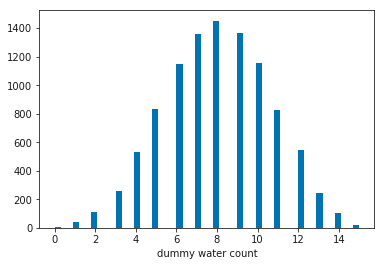

In [71]:
# 3M3
dummy_w = stats.binom.rvs(n=15, p=samples_1)
plt.hist(dummy_w, bins=50)
plt.xlabel('dummy water count');

In [73]:
sum( dummy_w == 8) / 1e4

0.1452

In [ ]:
def posterior_grid_approx(grid_points=100, success=6, tosses=9):
    """
    """
    # define grid
    p_grid = np.linspace(0, 1, grid_points)

    # define prior
    prior = np.repeat(5, grid_points)  # uniform
    #prior = (p_grid >= 0.5).astype(int)  # truncated
    #prior = np.exp(- 5 * abs(p_grid - 0.5))  # double exp

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior
